In [1]:
# SVM for 400mM ethanol
# Conny Lin | started: June 11, 2020 | updated: June 20, 2020

In [2]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import brainstation_capstone
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
datapath = localpaths['datapath']

# import standard libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

getting host computer specific paths
None
None


In [3]:
# ML specific 
outputfolder = os.path.join(pCapstone,'ml_svm')
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [8]:
from brainstation_capstone.etl.datatransform import Nutcracker
NC = Nutcracker(datapath)
X_train, X_test, y_train, y_test = NC.mldata()

In [9]:
X_train.shape

(1600000, 21)

In [12]:
X_test.shape

(400000, 21)

running c=1e-05
running c=0.0001


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.001


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.01


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.1


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=1


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=10


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=100


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=1000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=10000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=100000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


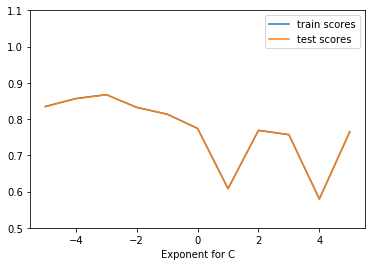

0.8670525


In [10]:
train_scores = []
test_scores = []
kernel=['linear','rbf','poly']
max_iter = 1000

for i in range(-5,6):
    c = 10**i
    print(f'running c={c}')
    my_svm = LinearSVC(C=c, max_iter=1000)
    my_svm.fit(X_train, y_train)

    train_scores.append(my_svm.score(X_train, y_train))
    test_scores.append(my_svm.score(X_test, y_test))

plt.figure()
plt.plot(range(-5,6), train_scores, label="train scores")
plt.plot(range(-5,6), test_scores, label="test scores")
plt.legend()
plt.ylim(0.5, 1.1)
plt.xlabel("Exponent for C")
plt.show()

print(np.max(test_scores))

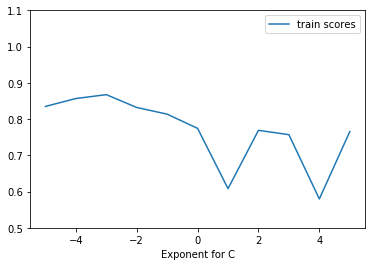

0.8670525


In [11]:
plt.figure()
plt.plot(range(-5,6), train_scores, label="train scores")
# plt.plot(range(-5,6), test_scores, label="test scores")
plt.legend()
plt.ylim(0.5, 1.1)
plt.xlabel("Exponent for C")
plt.show()

print(np.max(test_scores))


more tuning

In [3]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import timeit

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
gamma = ['scale']
max_iter = [1000]
random_state = [318]
# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma, max_iter=max_iter, random_state=random_state)

# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, _, y_train, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# grid search setting
cv = 5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print('printing individual results')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

None
None
Fitting 5 folds for each of 21 candidates, totalling 105 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print('printing individual results')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))